# FIT 5196 Assessment 2: Data Cleaning

#### Student Name: Surbhi Sanjay Peshwe
#### Student Id: 30060567

 Date: 4-10-2018 

Environment: Python 2.7.11 and Jupyter Notebook
Libraries used:
* pandas 
* numpy
* matplotlib (for plotting)
* GridSearchCV
* neighbors

## 1. Introduction
This analysis extract data from the given dataset as csv file. Data is extracted by reading the input file '30060567.csv' , finding the errors in the datasets and then fixing it by various methods.

The dataset is about delivering packages using drones in Victoria, Australia. 
***write about data cleaning***
This data set contains the following variable:
* Id - Unique id for the delivery
* Drone Type - Types of Drone (takeOff, OnRoute, Landing) 
* Post Type - a boolean variable indicates weather 
* Package weight - weight of the package
* Origin region - region for the origin of the delivery
* Destination region - region for the destination of the delivery
* Origin Latitude - Latitude of the origin
* Origin Longitude - Longitude of the origin
* Destination Latitude - Latitude of the destination
* Destination Longitude - Longitude of the destination
* Distance - Distance of the Journey
* Departure date - Date of the departure
* Departure time - Time of the departure
* Travel time - Travel time of the journey
* Delivery time - Time of the delivery
* Delivery price - Delivery fare

## 2. Import Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



## 3. Examing and Loading Data

The file 30060567.csv contains 36602 rows and 16 columns where it provides an information of how packets are deliver using Drone. In order to clean this dataset, first we need to check the errors in it and then fix it accordingly.
Initially, we can check the relations between column by graphical and non-graphical EDA.

#### 3.1 Initial loading csv file
The data has been loaded and stored in Pandas DataFrame. 

In [2]:
#reading file
main_df = pd.read_csv('30060567.csv')


#### 3.2 Examine the dataset


In [3]:
#number of rows and columns
print(main_df.shape)
#reading top 5 rows
main_df.head()

(36602, 16)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1834785454,1.0,0.0,16.293,2.0,27.0,-38.360810,147.323854,-36.764111,143.027329,418.66,2018-07-04,20:57:17,411.85,3:49:08,114.14
1,ID1737270123,1.0,0.0,41.582,47.0,1.0,-38.262187,144.969571,-37.496778,145.506006,97.37,2018-07-10,07:44:31,100.92,9:25:26,76.94
2,ID1959080078,2.0,0.0,23.518,24.0,38.0,-37.233290,146.160671,-37.665601,143.381099,250.30,2018-01-09,11:55:50,224.54,15:40:22,119.74
3,ID1590889569,2.0,0.0,12.991,21.0,31.0,-36.680832,144.968532,-37.193321,148.374020,308.31,2018-05-13,19:27:02,274.98,0:02:00,133.86
4,ID5694828340,2.0,1.0,43.715,13.0,35.0,-37.412662,144.468331,-38.995723,148.077381,361.51,2018-05-06,23:51:34,321.24,5:12:48,188.93


We've got a sense of the variables, their class type, and the first few observations of each by observing the data. We know that we are working with 36602 observations of 16 variables. 

From the above observation, we examined that categorical variables and numerical variables.
* Categorical Variables : Drone Type, Post Type, Origin region, Destination Region
* Numerical Variables : Id, Package Weight, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36602 entries, 0 to 36601
Data columns (total 16 columns):
Id                       36580 non-null object
Drone Type               36592 non-null float64
Post Type                36582 non-null float64
Package Weight           36602 non-null float64
Origin Region            36592 non-null float64
Destination Region       36592 non-null float64
Origin Latitude          36602 non-null float64
Origin Longitude         36602 non-null float64
Destination Latitude     36602 non-null float64
Destination Longitude    36602 non-null float64
Journey Distance         36602 non-null float64
Departure Date           36602 non-null object
Departure Time           36602 non-null object
Travel Time              36562 non-null float64
Delivery Time            36602 non-null object
Delivery Fare            36574 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


Here, we can see that there are few entries missing in columns like ID,Drone Type,Post Type,Origin Region , Destination Region, Travel time and Delivery fare. As the data contents numeric values it is observed that  Id, Departure Time, Departure Date and Delivery fare column data type is object which means it is generic type stored as string.

In [5]:
main_df.isnull().sum()

Id                       22
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            28
dtype: int64

It is expected to have uniques IDs for each packet. But as we can observe that there are 22 IDs missing and few IDs are also repeated therefore it needs to be investigate the data further. There are missing values in few columns which needs to be fixed further.

By calculating summary statistics on data we can easily spot the outliers.

In [6]:
main_df.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,36592.000000,36582.000000,36602.000000,36592.000000,36592.000000,36602.000000,36602.000000,36602.000000,36602.000000,36602.000000,36562.000000,36574.000000
mean,1.700016,0.297933,24.850294,24.027000,23.971059,-37.710602,145.447744,-37.723218,145.421745,218.531150,206.472243,135.115361
std,0.781647,0.457356,11.575835,13.562306,13.550737,1.931299,7.027570,1.928005,7.028434,113.551569,104.637483,61.495978
min,1.000000,0.000000,5.001000,1.000000,1.000000,-39.006892,-148.293477,-39.006892,-148.446778,0.359000,7.040000,60.690000
25%,1.000000,0.000000,14.822000,12.000000,12.000000,-38.459106,144.160208,-38.466281,144.146264,132.096250,126.700000,103.890000
50%,1.000000,0.000000,24.891000,24.000000,24.000000,-37.767106,145.561869,-37.787735,145.545867,207.238500,195.535000,128.505000
75%,2.000000,1.000000,34.713750,36.000000,36.000000,-37.068456,147.143618,-37.086099,147.073969,292.004500,274.267500,154.837500
max,3.000000,1.000000,53.999000,47.000000,47.000000,38.952681,148.450644,38.547109,148.450644,552.688000,541.550000,1234.760000


Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
The observation tells us that 
* Total samples are 36580.
* Drone Type is a categorical feature with 1, 2 and 3 values.
* Post Type is a categorical feature with 0 and 1 values.
* There are maximum 47 origin and destination regions where 10 values.
* There are negative longitude values in "Origin Longitude" and "Destination Longitude" column.
* The minimum Journey Distance is 0.359km.
* Fares varied significantly from 75% to maximum. It shows that their are outliers in "Delivery Fare" column.
* Some missing values exist in the "Drone Type","Post Type","Package Weight","Origin Region","Destination Region","Travel Time","Delivery Fare" column.

It can be observed that Delivery Fare column consists outliers. The maximum value is 1234.760000 whereas the median is 128.505000.

In [7]:
#checking the correlation between columns of dataset
main_df.corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,1.000000,0.001050,0.002037,0.008435,0.001165,-0.011286,0.006402,0.013361,-0.010442,-0.002577,-0.110702,0.412096
Post Type,0.001050,1.000000,-0.004508,0.001702,-0.003032,0.003875,-0.004684,-0.007523,0.005116,-0.009862,-0.010368,0.275430
Package Weight,0.002037,-0.004508,1.000000,0.000486,-0.004707,-0.001727,0.001570,0.008636,-0.005979,0.005049,0.004935,0.186030
Origin Region,0.008435,0.001702,0.000486,1.000000,-0.007592,-0.066454,-0.000132,0.007882,-0.007482,0.099052,0.096986,0.029256
Destination Region,0.001165,-0.003032,-0.004707,-0.007592,1.000000,0.001790,-0.000493,-0.069055,-0.001517,0.098003,0.097390,0.017921
Origin Latitude,-0.011286,0.003875,-0.001727,-0.066454,0.001790,1.000000,-0.882228,0.002027,-0.000253,0.014444,0.016037,-0.004961
Origin Longitude,0.006402,-0.004684,0.001570,-0.000132,-0.000493,-0.882228,1.000000,-0.002909,0.000982,-0.004493,-0.005775,0.001277
Destination Latitude,0.013361,-0.007523,0.008636,0.007882,-0.069055,0.002027,-0.002909,1.000000,-0.881723,-0.001720,-0.003400,0.000048
Destination Longitude,-0.010442,0.005116,-0.005979,-0.007482,-0.001517,-0.000253,0.000982,-0.881723,1.000000,0.008122,0.008977,0.001612
Journey Distance,-0.002577,-0.009862,0.005049,0.099052,0.098003,0.014444,-0.004493,-0.001720,0.008122,1.000000,0.991783,0.184492


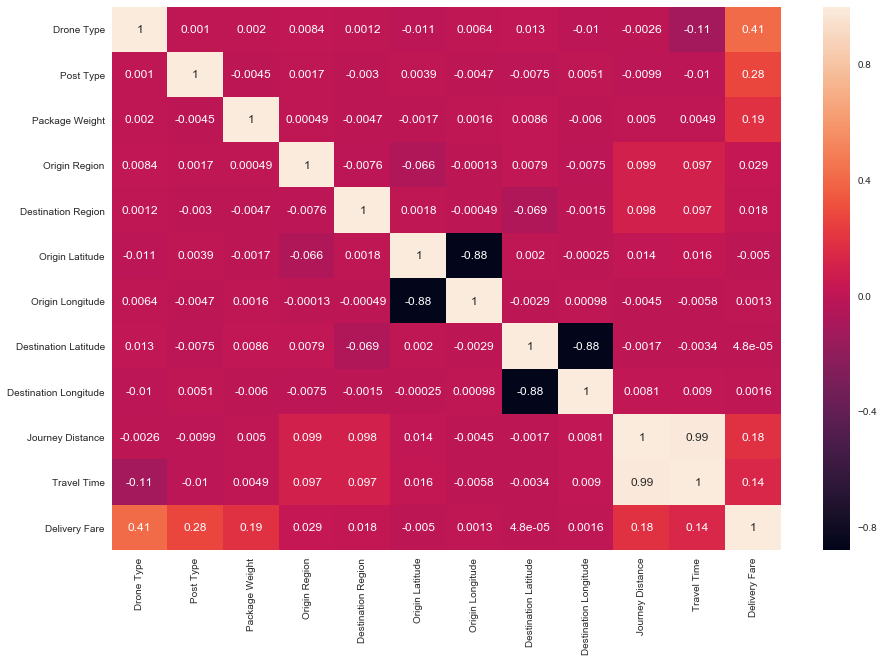

In [8]:
#Plotting graphical correlation between columns
plt.rcParams['figure.figsize']= 15,10
sns.set_style('whitegrid')
sns.set(color_codes=True)

sns.heatmap(main_df.corr(), annot =True)

The heat map shows that the Drone Type are negatively correlated with Travel Time. The journey distance and travel time are positively correlated with each other. 

In [9]:
#Descriptive statistics for columns with object datatype
main_df.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,36580,36602,36602,36602
unique,36542,269,29832,29748
top,ID1413368149,2018-02-28,09:51:47,3:19:39
freq,2,224,7,6


From the above table, we can observe that :
* Id are not unique across the datset. There are 38 (36580 - 36542) duplicate IDs which appeared twice in dat set.
* There are missing values in IDs.

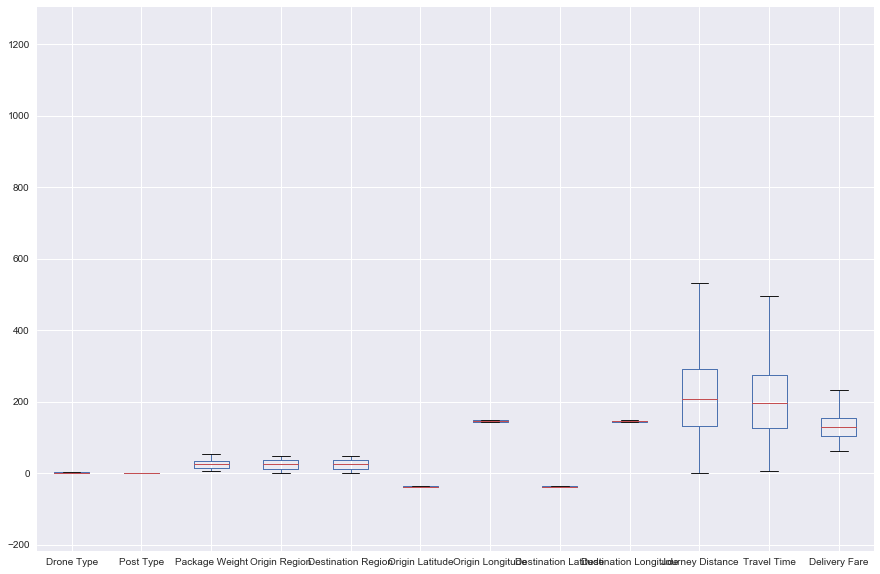

In [10]:
main_df.boxplot()

The above boxplot helps use to visualise the outliers in the dataset through each column. As observed delivery fare column has the outliers ranging from 200 to above 1200 which tells that Delivery column must be fixed by removing the outliers present in it.

### 4. Identifying Anomalies

After analysising the dataset, I have found the syntactical and semantic anomalies and they are as follows:
* Syntactical Anomalies : Departure Date, Departure time, Delivery time, Origin Latitude , Origin Longitude, Destination Latitude, Destination Longitude.
* Semantic Anomalies: Post type, Drone Type , Id , Origin Region, Destination Region, Journey distance, Travel Time.

#### 4.1: ID column
In the datset, IDs should be unique as specified, but we have found an error in Id column by there are 22 missing values 
and 38 duplicate Id which need to be fixed. 

In [11]:
#frequency count of ID's
#using dropna=False , it also counts the missing values
#there are 38 duplicate ID's
main_df.Id.value_counts(dropna = False)

NaN             22
ID1188036398     2
ID1886293632     2
ID1852336779     2
ID1793563091     2
ID1191734100     2
ID5901653379     2
ID1256357508     2
ID1316204931     2
ID5857862460     2
ID1557022514     2
ID1810551572     2
ID1828425470     2
ID5112435502     2
ID1800298976     2
ID5561795077     2
ID1919260200     2
ID1355483588     2
ID1364050553     2
ID1990915307     2
ID1764154590     2
ID1642265037     2
ID1627252691     2
ID5692195072     2
ID1547270099     2
ID1187402609     2
ID5214462835     2
ID1595558126     2
ID1411992435     2
ID1875344441     2
                ..
ID1869383152     1
ID1478272568     1
ID5245768181     1
ID1761066209     1
ID5560849739     1
ID1462433406     1
ID1759372072     1
ID1470272527     1
ID1379905319     1
ID1397315320     1
ID1609131879     1
ID1367126248     1
ID5654794223     1
ID1870716656     1
ID1360330130     1
ID5423874736     1
ID5700541948     1
ID5945771616     1
ID1504852100     1
ID1724939005     1
ID1810351508     1
ID5692488178

#### 4.2. Post Type Column
In the dataset, after observing the pattern of the Post Type it is related with ID column and they are correlated with each other. It is found that Post Type 0 is mostlyfor the ID s starting with 1 and Post Type 1 is for IDs starting with 5. 
There are 20 missing values in the PostType column and it has found that few  values are 0 for IDs starting with 5 and 1 for IDs starting with 1.

In [12]:
#Observe the pattern
check_pt = main_df.filter(['Id','Post Type'],axis=1)
check_pt

,Id,Post Type
0,ID1834785454,0.0
1,ID1737270123,0.0
2,ID1959080078,0.0
3,ID1590889569,0.0
4,ID5694828340,1.0
5,ID1947075361,0.0
6,ID1461388630,0.0
7,ID1476029874,0.0
8,ID5466286066,1.0
9,ID1464928552,0.0


#### 4.3: Origin Region and Destination Region
In the dataset, there are 10 values missing in both the column Origin Region and Destination Region. These missing  values can be fixed through Origin and Destination Latitude-Longitudes. As a region has a specific coordinates i.e latitude-longitude, we need to identify the missing region numbers from the corresponding coordinates/latitude-longitude.

In [13]:
#checking origin region and destination region missing values
check_or = main_df['Origin Region'].isnull().sum()
check_dr = main_df['Destination Region'].isnull().sum()
print(check_or,check_dr)

(10, 10)


#### 4.4: Longitude-Latitude

In the dataset, there is no missing values in origin and destination latitude-longitude. After visualising these coordinates on map, as we are provided with the data for Victoria State which lies in southern and eastern hemisphere. Geographically as Victoria lies below equator, latitudes of Victoria must be negative values and the longitudes must be positive values.
Accordinly, we need to check that latitudes must be negative and longitudes must be postive.

In [14]:
# Checking for the negative values in the Origin Latitude column.
check_olat = (list(main_df['Origin Latitude']))
if all(i < 0 for i in check_olat):
    print('Values are negative')
else:
    print('There are positive values')

There are positive values


In [15]:
# Checking for the negative values in the Origin Longitude column.
check_olon = (list(main_df['Origin Longitude']))
if all(i > 0 for i in check_olon):
    print('Values are positive')
else:
    print('There are negative values')

There are negative values


In [16]:
# Checking for the negative values in the Destination Latitude column.
check_dlat = (list(main_df['Destination Latitude']))
if all(i < 0 for i in check_dlat):
    print('Values are negative')
else:
    print('There are positive values')

There are positive values


In [17]:
# Checking for the negative values in the Destination Latitude column.
check_dlon = (list(main_df['Destination Longitude']))
if all(i < 0 for i in check_dlon):
    print('Values are positive')
else:
    print('There are negative values')

There are negative values


#### 4.5: Journey Distance
Journey Distance column can to be verified using origin and destination latitudes-longitudes. As we are provided with the origin coordinates and destination coordinates, we can check the distance between two points on sphere given their latitude-longitude by using Haversine Formula. The Haversine Formula uses the latitude-longitude of two points and radius of the earth.

#### 4.6. Departure Date 

As departure datae is not correlated with any other column therefore it needs to be checked within itself. There are no missing values in departure date. Later invalid dates were checked and it was found that there are invalid dates which need to be fixed in proper format so that they turns out to be valid.

In [18]:
import datetime

def check_date_validation(year, month, day=1):
    correct_date = None
    try:
        datetime.datetime(year=year, month=month, day=day)
        correct_date = True
    except ValueError:
        correct_date = False
    return correct_date

# checking the incorrect date.
k=0
for i in main_df.values:
    try:
        if check_date_validation(int(main_df['Departure Date'][k].split('-')[0]),int(main_df['Departure Date'][k].split('-')[1]),int(main_df['Departure Date'][k].split('-')[2])) == False:
             print(i[11])
        k+=1
    except IndexError:
        continue

2018-24-07
2018-26-05
2018-18-07
2018-13-07
2018-18-04
2018-06-31
2018-06-31
2018-04-31
2018-17-06
2018-21-04
2018-20-04
2018-17-04
2018-18-02
2018-14-05
2018-14-05
2018-26-03
2018-14-07
2018-06-31
2018-04-31
2018-02-30
2018-04-31
2018-04-31
2018-04-31
2018-19-05
2018-25-05
2018-13-06
2018-24-07
2018-15-01
2018-18-06
2018-22-03
2018-15-04
2018-24-01
2018-02-30
2018-06-31
2018-20-04
2018-13-07
2018-19-03
2018-06-31
2018-02-30
2018-02-30
2018-04-31
2018-02-30
2018-06-31
2018-20-01
2018-22-03
2018-22-05
2018-22-04
2018-18-06
2018-22-03
2018-15-05
2018-28-05
2018-20-01
2018-04-31
2018-24-06
2018-04-31
2018-04-31
2018-20-06
2018-22-03
2018-16-06
2018-02-30
2018-15-04
2018-04-31
2018-06-31
2018-02-30
2018-25-06
2018-21-03
2018-19-05
2018-23-02
2018-24-03
2018-21-01
2018-04-31
2018-24-01
2018-02-30
2018-04-31
2018-04-31
2018-06-31
2018-04-31
2018-06-31
2018-06-31
2018-06-31
2018-23-07
2018-21-07
2018-23-01
2018-14-07
2018-28-02
2018-19-03
2018-17-07
2018-26-03
2018-17-01
2018-02-30
2018-02-30

#### 4.7: Departure and Delivery Time
In these Time column there are no missing values so to check whether these column has any error it has check whether they are exceeding the time limit or not. Below we have checked that there is no number limit exceeding. Therefore we can conclude time is correct. As these are time columns we need to check format of thesecolumn as they need to be proper formatted. 

## 5. Fixing the Errors

### 5.1: Fixing Post Type column

As mentioned aboved after the analysing the dataset, Post Type with 0 value was observed mainly with Id starting with 1 and Post Type with value 1 where observed with Id starting with 5. Using this pattern, missing values were filled and incorrect value were replaced with correct values by regular expression on the pattern. Based on the index value of Ids, the correct value was imputed corresponding to that ID. Later the column was verified by checking the null values and length of the column.

In [19]:
#Checking the sum of missing values of Post Type column
main_df['Post Type'].isnull().sum()

20

In [20]:
#Reading the rows of Post Type missing value
main_df[main_df['Post Type'].isnull()].head()


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
2183,ID1285112413,1.0,NaN,29.888,33.0,15.0,-38.081305,142.846253,-37.112920,143.847879,139.370,2018-07-24,13:38:09,141.57,15:59:43,86.58
4202,ID5730617122,1.0,NaN,25.749,45.0,18.0,-37.606190,148.075583,-37.411082,146.799460,114.759,2018-06-27,05:25:10,117.75,7:22:55,138.00
4215,ID1726432043,2.0,NaN,51.712,47.0,7.0,-38.358050,144.852968,-38.043837,145.487699,65.623,2018-07-10,09:17:53,63.95,10:21:50,241.36
4239,ID1679756915,3.0,NaN,21.290,33.0,10.0,-38.071641,142.812838,-37.019799,147.338986,416.230,2018-06-02,05:05:25,358.57,11:03:59,185.81
12391,ID1803324636,1.0,NaN,6.108,38.0,12.0,-37.696716,143.388226,-38.036518,146.732404,296.288,2018-01-14,17:44:08,293.42,22:37:33,99.35


In [21]:
#Collect the missing value index in a list
Post_type_null = main_df[main_df['Post Type'].isnull()].index.tolist()

#Fixing the Post Type column using regular expression
first_id = re.compile(r'ID1.*')
second_id = re.compile(r'ID5.*')
for index in Post_type_null:
    if first_id.match(main_df['Id'].iloc[index]):
        main_df['Post Type'].iloc[index] = 0
    if second_id.match(main_df['Id'].iloc[index]):
        main_df['Post Type'].iloc[index] = 1 

C:\Users\spes0001\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#Verifying the post type column
main_df['Post Type'].isnull().sum()

0

In [23]:
#Verifying the length of post type column in dataframe
len(main_df['Post Type'])

36602

Finally the Post Type column missing values are imputed and the errors are fixed. 

### 5.2: Fixing Package Weight 

Looking at the package weight column, it has been observed that Package Weight column is not correlated with any other column. It is an independent column and not dependent for fixing error on any other column. Since it is a weight of packet, it cannot be negative. Therefore just to check if there is any error in the column, we checking if there is any negative value.

In [24]:
# Checking the missing value 
main_df['Package Weight'].isnull().sum()

0

In [25]:
# Checking for the negative values in the column.
check_pw = (list(main_df['Package Weight']))
if all(i > 0 for i in check_pw):
    print('Values are positive')
else:
    print('There are negative values')

Values are positive


From above analysis and verification, it is concluded that there is no error in package weight column.

### 5.3: Fix Latitudes and Longitudes

As mentioned above, the latitudes of Victoria State mustbe negative and longitudes must be positive. by visualisation we can analyse it using BaseMap.  The given dataset points lies in the southern hemisphere of globe. The latitude and logitude are fixed by multiplying the positive values in latitudes with -1 and the negative values of longitude with -1. After multiplication, all values of latitude columns becomes negative and all values of longitude columns become positve. 

In [26]:
d_lat = main_df['Destination Latitude'].values
d_lon = main_df['Destination Longitude'].values


C:\Users\spes0001\AppData\Local\Continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\spes0001\AppData\Local\Continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


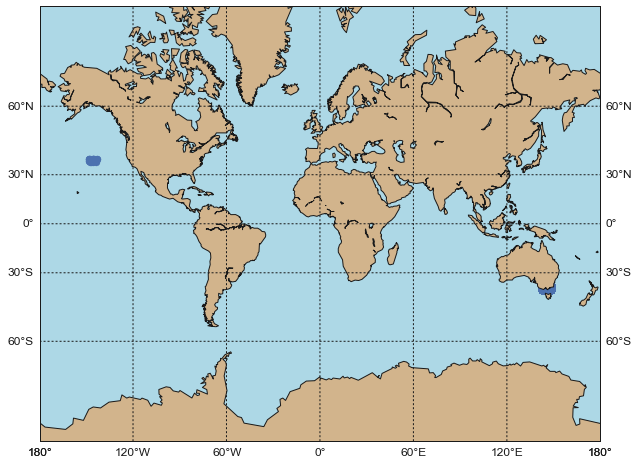

In [27]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.scatter(d_lon,d_lat,latlon=True)


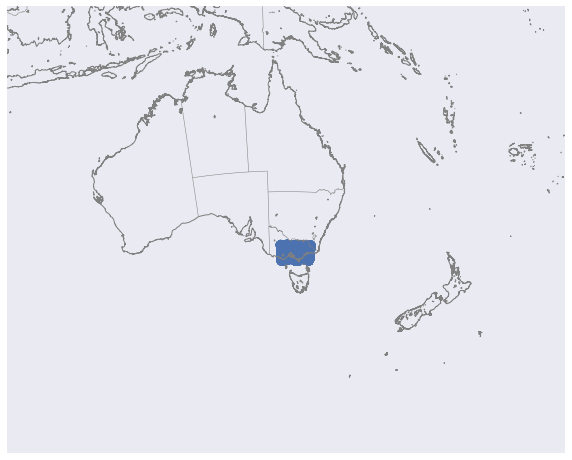

In [28]:
#Plotting basemap

fig = plt.figure(figsize=(10,10))
a = Basemap(projection='lcc',resolution='h',lat_0=-34.5,lon_0=144,width=9E6,height=7.2E6)
a.drawcoastlines(color='gray')
a.drawcountries(color='gray')
a.drawstates(color='gray')
a.scatter(d_lon,d_lat,latlon=True)

Here is the scatterplot which show the points before fixing latitude and longitude columns. It can be observed that the scales of scatterplot out of range which indicates that we need to fix the columns.

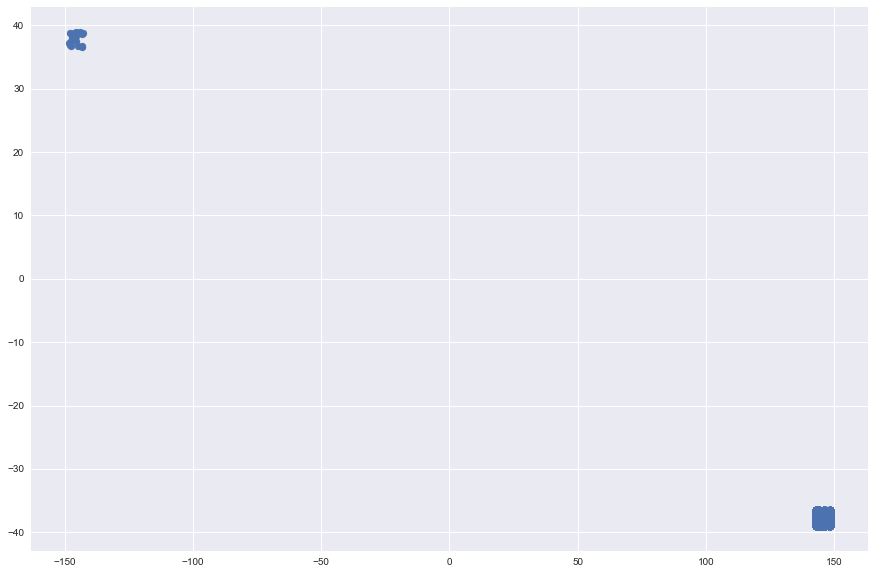

In [29]:
#plotting before fixing latitude longitude of origin region
plt.scatter(main_df['Origin Longitude'],main_df['Origin Latitude'])

In [30]:
# Fixing origin and destination latitude and longitude.
main_df['Origin Latitude'] = np.where((main_df['Origin Latitude']>0),main_df['Origin Latitude']*-1,main_df['Origin Latitude'])
main_df['Destination Latitude'] = np.where((main_df['Destination Latitude']>0),main_df['Destination Latitude']*-1,main_df['Destination Latitude'])
main_df['Origin Longitude'] = np.where((main_df['Origin Longitude']<0),main_df['Origin Longitude']*-1,main_df['Origin Longitude'])
main_df['Destination Longitude'] = np.where((main_df['Destination Longitude']<0),main_df['Destination Longitude']*-1,main_df['Destination Longitude'])

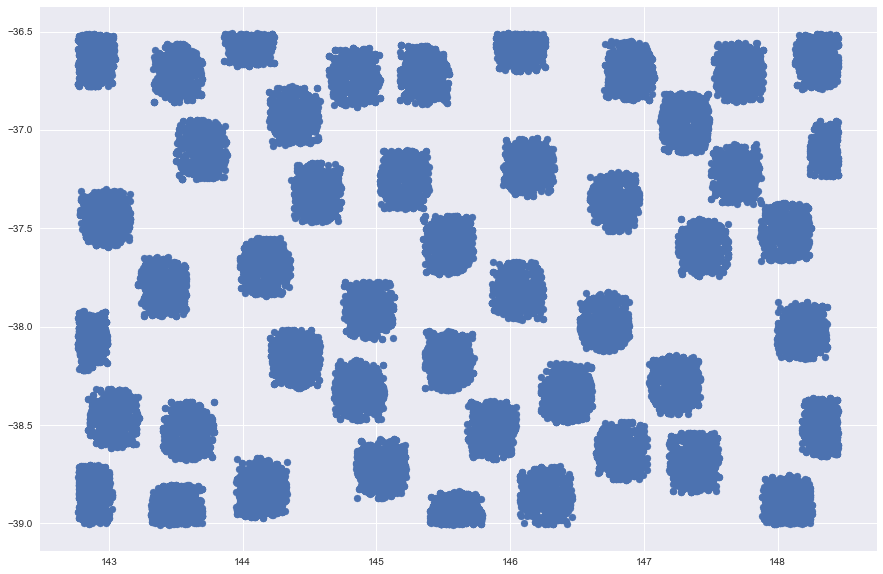

In [31]:
#plotting after fixing latitude longitude of origin region
plt.scatter(main_df['Origin Longitude'],main_df['Origin Latitude'])

Here the Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude columns are fixed. From the scatterplot above it is verified that the latitude-longitudes of origin and destination are fixed as the scale of x-axis and y-axis lies in Victoria State itself.

### 5.4: Fixing Origin Region 

The Origin Region is fixed by using KNN clustering algorithm where we calculate distance between points. Here we are using regressor which gives the nearest value of the k nearest neighbors. By using this value, the missing values are been imputed
KNN algorithm calculates the average of the origin region of the Knearest neighbours where in the training dataset are in x-traing it is origin latitude and origin longitude and y-train is origin region.

In [32]:
#Creating new dataframe with only origin region, Origin Latitude and origin longitude
fix_or = main_df.filter(['Origin Region' ,'Origin Longitude', 'Origin Latitude'],axis=1)
fix_or.head()

,Origin Region,Origin Longitude,Origin Latitude
0,2.0,147.323854,-38.360810
1,47.0,144.969571,-38.262187
2,24.0,146.160671,-37.233290
3,21.0,144.968532,-36.680832
4,13.0,144.468331,-37.412662


In [33]:
fix_or_null = fix_or[fix_or['Origin Region'].isnull()]
fix_or_null

,Origin Region,Origin Longitude,Origin Latitude
6,NaN,146.666435,-37.840775
69,NaN,144.850069,-38.420526
4116,NaN,147.975226,-38.909002
8209,NaN,145.584291,-38.959583
10276,NaN,144.251021,-38.940755
16423,NaN,146.671909,-37.957321
24610,NaN,148.273071,-36.996141
32772,NaN,143.089288,-38.366568
32801,NaN,143.426841,-38.511028
34840,NaN,147.341796,-37.556390


In [34]:
#Removing the NAN from the Id column
fix_or.dropna(axis=0,inplace=True)

In [35]:
#creating new datframe which consists only orgin latitude-longitudes
fix_or_nulldrop =fix_or_null .filter(['Origin Longitude', 'Origin Latitude'],axis=1)

In [36]:
#checking null values
fix_or['Origin Region'].isnull().sum()

0

In [37]:
#creating train datset
x_train = fix_or.drop('Origin Region', axis=1)
y_train = fix_or['Origin Region']

In [38]:
#fitting model 
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 8}

In [39]:
#predicting on the test set 
predict = model.predict(fix_or_nulldrop)
predict

array([12., 47., 35., 44., 30., 12., 31., 40., 28., 22.])

In [40]:
#Imputing missing values of Origin Region
main_df.loc[[6],'Origin Region'] = [12.0]
main_df.loc[[69],'Origin Region'] = [47.0]
main_df.loc[[4116],'Origin Region'] = [35.0]
main_df.loc[[8209],'Origin Region'] = [44.0]
main_df.loc[[10276],'Origin Region'] = [30.0]
main_df.loc[[16423],'Origin Region'] = [12.0]
main_df.loc[[24610],'Origin Region'] = [31.0]
main_df.loc[[32772],'Origin Region'] = [40.0]
main_df.loc[[32801],'Origin Region'] = [28.0]
main_df.loc[[34840],'Origin Region'] = [22.0]


From the above process after creating and predicting model, Origin Regions missing values are filled.

<Figure size 3600x3600 with 0 Axes>

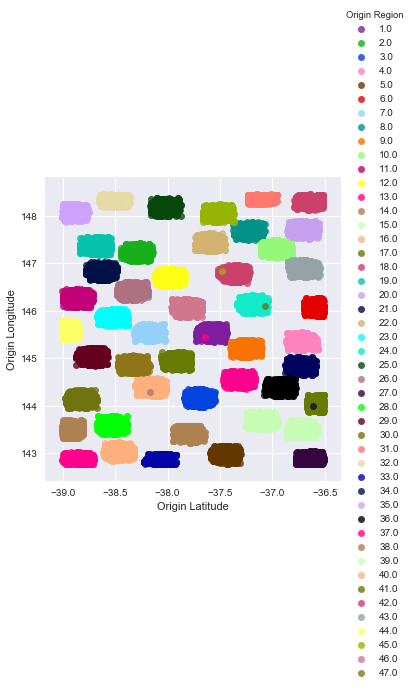

In [41]:
#Plot the origin region and destination region 
import seaborn as sns
plt.figure(figsize=(50,50))
color_list = ["purple","green","blue","pink","brown","red","light blue","teal","orange","light green","magenta","yellow","hot pink","light brown","pale green","peach","olive green","dark pink","turquoise","lavender","dark blue","tan","cyan","aqua","forest green","mauve","dark purple","bright green","maroon","olive","salmon","beige","royal blue","navy blue","lilac","black","hot pink","light brown","pale green","peach","olive green","dark pink","cool grey","canary","booger green","muted pink","hazel","dark royal blue","golden","pale lilac"]
current_palette = sns.xkcd_palette(color_list)
sns.lmplot( x="Origin Latitude", y="Origin Longitude", data=main_df, fit_reg=False, hue='Origin Region' ,legend=True, palette=current_palette)

After imputing the values in the origin region column and then plotting it, we can observe that there are other colour dots in the large chunk which shows that there are few errors in origin region where the values are incorrect because of which the other region point is placed in the another region.

### 5.5: Fixing Destination Region

The Destination Region is fixed by using KNN clustering algorithm where we calculate distance between points. Here we are using regressor which gives the nearest value of the k nearest neighbors.By using this value, the missing values are been imputed
KNN algorithm calculates the average of the origin region of the Knearest neighbours where in the training dataset are in x-traing it is origin latitude and origin longitude and y-train is origin region.

In [42]:
#Creating new dataframe with only Destination region, Destination Latitude and Destination longitude
fix_dr = main_df.filter(['Destination Region' ,'Destination Longitude', 'Destination Latitude'],axis=1)


In [43]:
#creating a dataframe which consists only missing values of destination region with their corresponding values
dest = fix_dr[fix_dr['Destination Region'].isnull()]
dest

,Destination Region,Destination Longitude,Destination Latitude
4160,NaN,143.619164,-38.384264
6188,NaN,145.893422,-36.532711
8257,NaN,142.822478,-38.192731
10288,NaN,146.924220,-36.640759
12347,NaN,148.312089,-36.771802
16441,NaN,148.221964,-38.955886
22574,NaN,147.242681,-38.330354
28735,NaN,145.555811,-38.982515
32813,NaN,144.222344,-37.643673
34882,NaN,143.188475,-38.523288


In [44]:
#Removing the NAN from the Destination Region column
fix_dr.dropna(axis=0,inplace=True)

In [45]:
#Creating new dataframe with only  Destination Latitude and Destination longitude
dest_new = dest.filter(['Destination Longitude', 'Destination Latitude'],axis=1)


In [46]:
#checking null values of Destination Region
fix_dr['Destination Region'].isnull().sum()

0

In [47]:
#creating train datset
x_traindest = fix_dr.drop('Destination Region', axis=1)
y_traindest = fix_dr['Destination Region']

In [48]:
#fitting a model
params1 = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn1 = neighbors.KNeighborsRegressor()

model1 = GridSearchCV(knn, params, cv=5)
model1.fit(x_train,y_train)
model1.best_params_

{'n_neighbors': 8}

In [49]:
#predicting on the test set 
predict1 = model.predict(dest_new)
predict1


array([28.,  6., 33., 43., 42., 35.,  2., 44.,  3., 40.])

In [50]:
#Imputing missing values of Destination Region
main_df.loc[[4160],'Destination Region'] = [28.0]
main_df.loc[[6188],'Destination Region'] = [6.0]
main_df.loc[[8257],'Destination Region'] = [33.0]
main_df.loc[[10288],'Destination Region'] = [43.0]
main_df.loc[[12347],'Destination Region'] = [42.0]
main_df.loc[[16441],'Destination Region'] = [35.0]
main_df.loc[[22574],'Destination Region'] = [2.0]
main_df.loc[[28735],'Destination Region'] = [44.0]
main_df.loc[[32813],'Destination Region'] = [3.0]
main_df.loc[[34882],'Destination Region'] = [40.0]

From the above process after creating and predicting model, Destination Regions missing values are filled.

<Figure size 3600x3600 with 0 Axes>

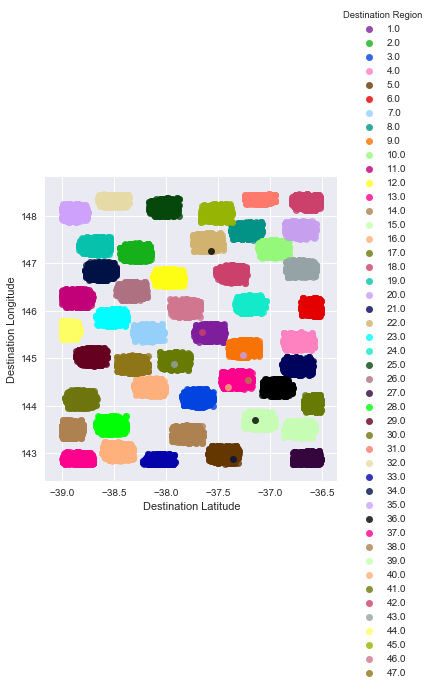

In [51]:
#Plot the origin region and destination region 
import seaborn as sns
plt.figure(figsize=(50,50))
color_list = ["purple","green","blue","pink","brown","red","light blue","teal","orange","light green","magenta","yellow","hot pink","light brown","pale green","peach","olive green","dark pink","turquoise","lavender","dark blue","tan","cyan","aqua","forest green","mauve","dark purple","bright green","maroon","olive","salmon","beige","royal blue","navy blue","lilac","black","hot pink","light brown","pale green","peach","olive green","dark pink","cool grey","canary","booger green","muted pink","hazel","dark royal blue","golden","pale lilac"]
current_palette = sns.xkcd_palette(color_list)
sns.lmplot( x="Destination Latitude", y="Destination Longitude", data=main_df, fit_reg=False, hue='Destination Region' ,legend=True, palette=current_palette)

After imputing the values in the destination region column and then plotting it, we can observe that there are other colour dots in the large chunk which shows that there are few errors in origin region where the values are incorrect because of which the other region point is placed in the another region.

### 5.6: Fixing Journey Distance Column

Journey Distance column needs to be verified using origin and destination latitudes-longitudes. As we are provided with the origin coordinates and destination coordinates, we can check the distance between two points on sphere given their latitude-longitude by using Haversine Formula. The Haversine Formula uses the latitude-longitude of two points and radius of the earth.
Since origin latitude and origin longitude are fixed now further now we can check if Journey Distance column dataset is correct or have some errors. Using haversine Formula we can check the distance travelled by drone from origin region and destination region.

In [52]:
# Checking Journey Distance via latitude and longitude.

from math import radians, cos, sin, asin, sqrt,atan2
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    km = 6378 * c
    return km
df1 = main_df["Origin Longitude"]
df2 = main_df["Origin Latitude"]
df3 = main_df["Destination Longitude"]
df4 = main_df["Destination Latitude"]
i=0
new_jd = []
for idx,val in enumerate(df1):
    new_jd.append(haversine(df1[idx], df2[idx],df3[idx],df4[idx]))

In [53]:
# new journeydistance column
main_df['Journey Distance'] = new_jd
main_df['Journey Distance']

0        418.660032
1         97.370189
2        250.299910
3        308.309599
4        361.509730
5         80.716718
6        211.579932
7        237.940275
8        132.729189
9        186.676940
10       117.609903
11       122.664520
12       334.700444
13        58.577724
14       364.160217
15       212.462851
16       333.207315
17        74.998089
18       143.020636
19       301.196989
20        90.133948
21       268.448308
22       163.345677
23        52.950153
24       483.503762
25       472.284093
26       190.572117
27       245.875647
28       227.585824
29       274.096751
            ...    
36572     94.422922
36573     53.476264
36574    428.421736
36575    139.059181
36576    482.751172
36577    421.367643
36578     13.332242
36579    183.269648
36580    468.922846
36581    464.127065
36582    446.411601
36583     60.046245
36584    280.878595
36585    326.035910
36586    211.735832
36587    141.935532
36588    288.077469
36589    252.259281
36590    105.640596


Haversine formula is implemented when there are coordinates of two points on sphere is given.Here using this sceneario on earth as sphere and coordintes as the latitude-longitude, the distance between two points are calculated and used for further fixing the other columns of the dataset. The journey distance is replaced by new journey distance. 

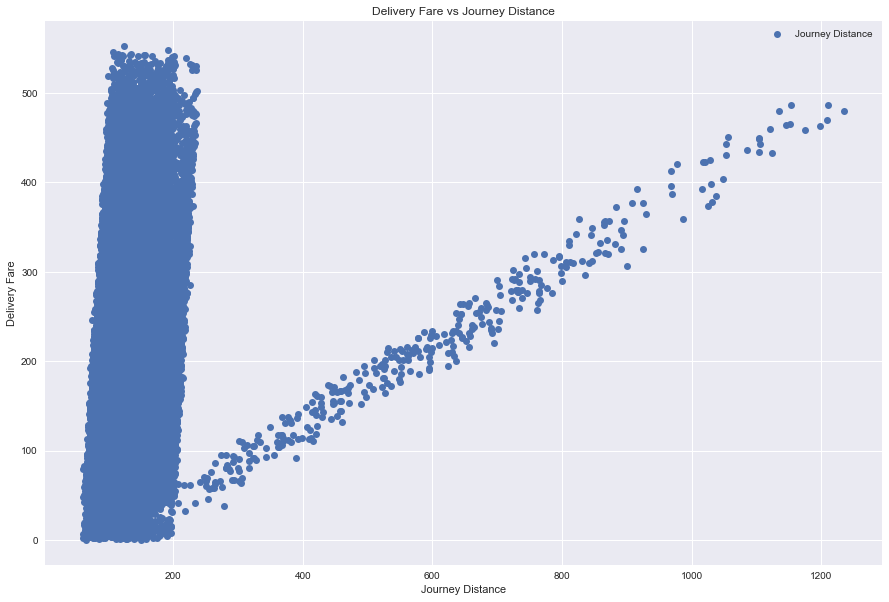

In [54]:
#plotting scatterplot between delivery fare and journey distance
main_df.plot(x='Delivery Fare', y='Journey Distance', style='o')  
plt.title('Delivery Fare vs Journey Distance')  
plt.xlabel('Journey Distance')  
plt.ylabel('Delivery Fare')  
plt.show()  

Here I have plotted scatterplot for my understanding to check how the relation is going on. After fixing journey distance it is linearly postive but is not related with delivery fare. This is because yet Delivery fare has error values in it. There is a weak relatin between these two column.

### 5.7: Fixing Travel Time 

Travel Time is dependent on Journey Distance column. Once Journey Distance is fixed then Travel Time can be fixed. Checking if there are errors in Travel Time by plotting Journey Distance with Travel Time. Since the  Journey distance and Travel Time are highly correlated with each other having 0.99 correlation value , we plot a linear regression between these two column to impute the travel time missing value. 

Here I have created a dataframe consisting of two columns journey distance and travel time and later made a copy of it. Then from original dataframe the missing values are dropped and the performance of these models are checked were one is complete and other doesnot have missing values. Then Train a linear regression model and predict the Travel Time 


In [55]:
#Creating new dataframe with only Journey distance and Travel Time
fix_tt = main_df.filter(['Journey Distance','Travel Time'],axis=1)
fix_tt.head()

,Journey Distance,Travel Time
0,418.660032,411.85
1,97.370189,100.92
2,250.299910,224.54
3,308.309599,274.98
4,361.509730,321.24


In [56]:
#calculating sum of missing values
fix_tt.isnull().sum()

Journey Distance     0
Travel Time         40
dtype: int64

In [57]:
#creating copy
fix_tt2 = fix_tt.copy()
fix_tt2.head()

,Journey Distance,Travel Time
0,418.660032,411.85
1,97.370189,100.92
2,250.299910,224.54
3,308.309599,274.98
4,361.509730,321.24


In [58]:
#dropping Travel Time
fix_tt2.dropna(subset=['Travel Time'],axis=0,inplace=True)

In [59]:
#linear fitting on dataframe
lm_fitting_df = fix_tt2.copy()
lm_fitting_df

,Journey Distance,Travel Time
0,418.660032,411.85
1,97.370189,100.92
2,250.299910,224.54
3,308.309599,274.98
4,361.509730,321.24
5,80.716718,75.04
6,211.579932,211.45
7,237.940275,207.91
8,132.729189,119.00
9,186.676940,169.21


In [60]:
from sklearn.linear_model import LinearRegression
lm_for_impute = LinearRegression()

In [61]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'Travel Time']],lm_fitting_df['Travel Time']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
lm_for_impute.predict(fix_tt.drop(['Travel Time'],axis=1))

array([389.37778117,  95.75091605, 235.51342477, ..., 221.25034704,
       246.06826789, 226.04631045])

In [63]:
fix_tt['Travel Time'][fix_tt['Travel Time'].isnull()] = lm_for_impute.predict(fix_tt.drop(['Travel Time'],axis=1))

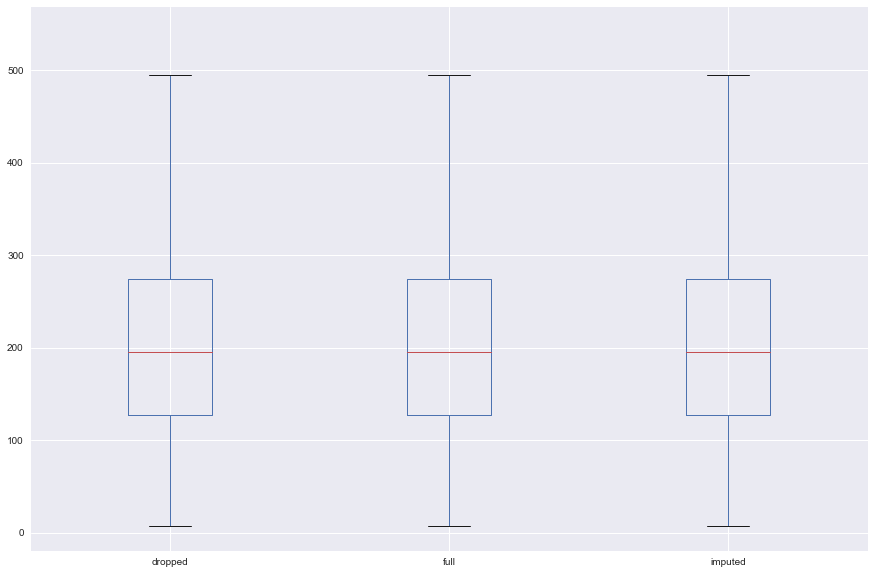

In [64]:
boxplot = pd.DataFrame({'imputed': fix_tt['Travel Time'],'full': main_df['Travel Time'],'dropped': fix_tt2['Travel Time']})
boxplot.plot(kind='box')

From the above boxplot we can observe that the length of the whiskers and the variance of the box is similar for all the boxplot.

In [65]:
main_df['Travel Time'] = fix_tt['Travel Time']

In [66]:
main_df['Travel Time'].isnull().sum()

0

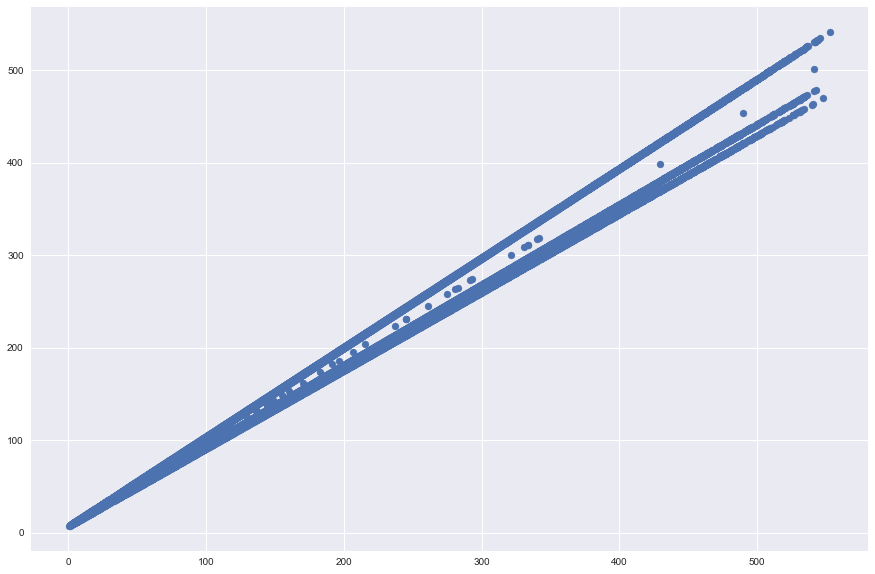

In [67]:
plt.scatter(main_df['Journey Distance'],main_df['Travel Time'])

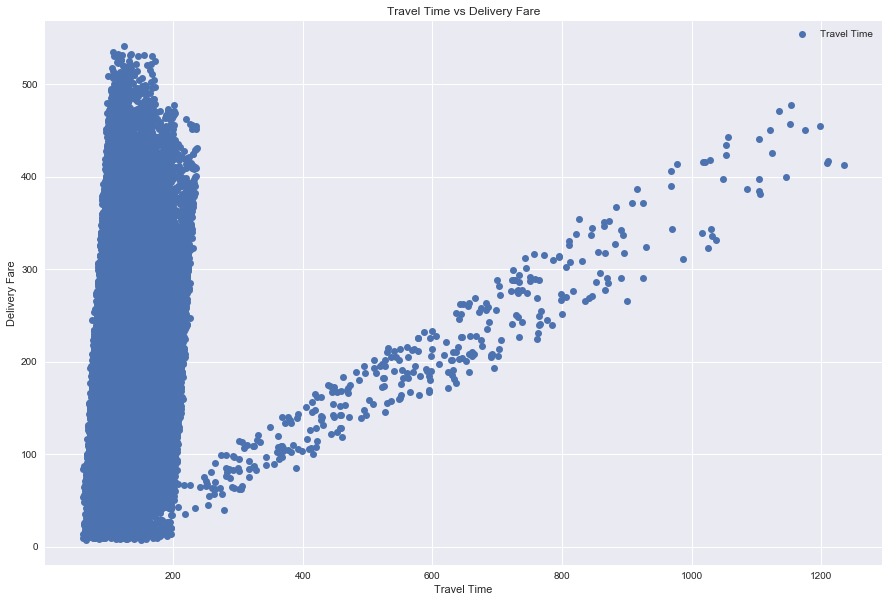

In [68]:
#Plotting between delivery fare and travel time
main_df.plot(x='Delivery Fare', y='Travel Time', style='o')  
plt.title('Travel Time vs Delivery Fare')  
plt.xlabel('Travel Time')  
plt.ylabel('Delivery Fare')  
plt.show()  

Here I have plotted scatterplot for my understanding to check how the relation is going on. After fixing travel time it is linearly postive but is not related with delivery fare. This is because yet Delivery fare has error values in it. There is a weak relatin between these two column.

### 5.8 Fixing ID column

ID column is fixed by dropping th NaN rows as they are just duplicates of the other rows. There for just drop the rows

In [69]:
#frequency count of ID's
#using dropna=False , it also counts the missing values
#there are 38 duplicate ID's
main_df.Id.value_counts(dropna = False)

NaN             22
ID1188036398     2
ID1886293632     2
ID1852336779     2
ID1793563091     2
ID1191734100     2
ID5901653379     2
ID1256357508     2
ID1316204931     2
ID5857862460     2
ID1557022514     2
ID1810551572     2
ID1828425470     2
ID5112435502     2
ID1800298976     2
ID5561795077     2
ID1919260200     2
ID1355483588     2
ID1364050553     2
ID1990915307     2
ID1764154590     2
ID1642265037     2
ID1627252691     2
ID5692195072     2
ID1547270099     2
ID1187402609     2
ID5214462835     2
ID1595558126     2
ID1411992435     2
ID1875344441     2
                ..
ID1869383152     1
ID1478272568     1
ID5245768181     1
ID1761066209     1
ID5560849739     1
ID1462433406     1
ID1759372072     1
ID1470272527     1
ID1379905319     1
ID1397315320     1
ID1609131879     1
ID1367126248     1
ID5654794223     1
ID1870716656     1
ID1360330130     1
ID5423874736     1
ID5700541948     1
ID5945771616     1
ID1504852100     1
ID1724939005     1
ID1810351508     1
ID5692488178

In [70]:
#Removing the NAN from the Id column
main_df.dropna(subset=['Id'],inplace=True)

In [71]:
#Checking if the NaN Id's are removed 
main_df['Id'].isnull().sum()

0

In [72]:
#Number of duplicate ID's
main_df.Id.duplicated(keep=False).sum()

76

### 5.9: Fixing Drone Type

Here i am trying to fix the drone type by calculating the speed using speed formula that is journey distance by travel time. After calculating the speed then mean of speed and mean of each drone type is fetched.

In [73]:
#getting the null values of drone type column
drone_null = main_df[main_df['Drone Type'].isnull()]
drone_null

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
4097,ID1632330400,NaN,0.0,19.033,1.0,34.0,-37.581005,145.468451,-38.547776,146.946002,168.372502,2018-04-28,22:54:04,153.29,1:27:21,139.97
8194,ID5468935282,NaN,1.0,36.590,45.0,19.0,-37.537543,148.019271,-38.599799,147.464461,127.852558,2018-06-12,10:51:56,130.42,13:02:21,115.97
8198,ID5479857745,NaN,1.0,7.406,14.0,40.0,-38.830398,143.476092,-38.547752,143.045128,48.909293,2018-05-26,17:50:46,54.03,18:44:47,121.32
10093,ID1779769807,NaN,0.0,38.621,28.0,3.0,-38.493716,143.641622,-37.642118,144.172774,105.608822,2018-07-28,03:43:04,98.72,5:21:47,133.25
10244,ID1957990234,NaN,0.0,7.921,12.0,6.0,-37.843164,146.767207,-36.601812,146.063977,151.591395,2018-01-11,14:23:51,138.70,16:42:32,112.29
11606,ID1223748479,NaN,0.0,19.526,13.0,39.0,-37.401633,144.634268,-36.693700,143.464309,130.439783,2018-06-18,07:36:41,132.93,9:49:36,77.59
18445,ID5306752673,NaN,1.0,25.725,47.0,45.0,-38.309157,144.921220,-37.609055,148.013418,282.347319,2018-06-03,05:44:36,252.40,9:57:00,187.16
22542,ID5948978963,NaN,1.0,21.883,45.0,41.0,-37.618464,148.100312,-38.036507,144.976515,278.559940,2018-06-09,22:53:55,276.27,3:30:11,154.63
28682,ID1575057434,NaN,0.0,41.513,37.0,43.0,-38.743422,142.809079,-36.731993,146.917006,425.265549,2018-02-27,19:58:10,418.24,2:56:24,107.08
32783,ID1711547395,NaN,0.0,25.767,25.0,20.0,-38.034362,148.134466,-36.693657,147.743389,153.201261,2018-01-13,11:50:12,154.95,14:25:08,79.45


### Detecting Outlier

In [74]:
main_df[main_df['Delivery Fare']>1100]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
2275,ID5607710111,1.0,1.0,49.041,33.0,31.0,-38.017256,142.946560,-37.109871,148.345299,486.890071,2018-01-19,05:10:13,477.88,13:08:05,1153.62
4149,ID5932717914,1.0,1.0,51.520,45.0,5.0,-37.525085,148.091446,-37.347859,142.828248,465.565363,2018-07-01,18:43:33,457.24,2:20:47,1151.55
4350,ID1427270428,3.0,0.0,51.232,14.0,31.0,-38.908120,143.313832,-37.142722,148.384476,486.034226,2018-02-13,07:51:12,417.56,14:48:45,1210.46
7700,ID1170728706,2.0,0.0,51.832,20.0,33.0,-36.600650,147.764034,-37.923795,142.967280,449.698166,2018-05-13,06:54:49,397.93,13:32:44,1104.40
7808,ID1888409932,3.0,0.0,49.928,5.0,35.0,-37.549712,143.034471,-38.911234,148.057433,464.556363,2018-06-20,20:09:24,399.41,2:48:48,1145.39
11074,ID1251160464,1.0,0.0,51.896,35.0,39.0,-38.973443,147.995296,-36.724031,143.614786,459.215050,2018-02-13,05:29:47,451.10,13:00:53,1120.55
11328,ID5280122744,1.0,1.0,53.358,32.0,40.0,-38.437753,148.311135,-38.395874,142.997953,463.365366,2018-07-14,01:03:39,455.11,8:38:45,1198.45
15406,ID1605393002,1.0,0.0,53.188,32.0,40.0,-38.558357,148.294421,-38.611760,143.141312,448.376784,2018-05-12,19:25:51,440.61,2:46:27,1104.25
19212,ID1711699004,2.0,0.0,53.620,43.0,37.0,-36.566851,146.836053,-38.789212,142.780408,434.521217,2018-01-03,10:26:40,384.73,16:51:23,1103.33
19987,ID1148957687,3.0,0.0,50.949,39.0,25.0,-36.724214,143.412805,-38.040613,148.145029,443.421723,2018-02-24,11:10:08,381.55,17:31:41,1105.17


From above rows we can observe that the delivery fare which are greater than 1000 has package weight around 50 kgs and the journey distance is between 400-500 km but the travel time varies between the columns. There are also 2 hours travel time and 23 hours travel time for the same distance . So we can assume these values are incorrect.

### 5.9 : Departure  Time and Delivery Time

Checking the departure time and delivery column. As there are no missing values in the columns I am just checking the format of the time. As these columns are not related with the other columns so they can be fixed individually if there are any errors. There I am just formatting the column to proper time format.

In [75]:
#formatting departure time
main_df['Departure Time'] =  pd.to_datetime(main_df['Departure Time'],errors='coerce', format='%H:%M:%S')

Departure_Time=[]
for i in main_df['Departure Time']:
    Departure_Time.append(i.time())
main_df['Departure Time'] = Departure_Time


In [76]:
#formatting delivery time
main_df['Delivery Time'] =  pd.to_datetime(main_df['Delivery Time'],errors='coerce', format='%H:%M:%S')
TimeStamp_list=[]
for i in main_df['Delivery Time']:
    TimeStamp_list.append(i.time())
main_df['Delivery Time'] = TimeStamp_list

### 5.10: Fixing Date

There are invalid dates in the datasets which need to be fixed . While manually studying the csv file few invalid dates were observed. Here below i have found invalid dates in the Departure Date column.

In [77]:
#checking dates from Departure Date column
main_df['Departure Date'].head()

0    2018-07-04
1    2018-07-10
2    2018-01-09
3    2018-05-13
4    2018-05-06
Name: Departure Date, dtype: object

In [78]:
# checking format of the date
import datetime

def date_validation(year, month, day=1):
    correct_date = None
    try:
        datetime.datetime(year=year, month=month, day=day)
        correct_date = True
    except ValueError:
        correct_date = False
    return correct_date

   

In [79]:
# checking the incorrect date.
k=0
for i in main_df.values:
    try:
        if date_validation(int(main_df['Departure Date'][k].split('-')[0]),int(main_df['Departure Date'][k].split('-')[1]),int(main_df['Departure Date'][k].split('-')[2])) == False:
             print(i[11])
        k+=1
    except IndexError:
        continue

2018-24-07
2018-26-05
2018-18-07
2018-13-07
2018-18-04
2018-06-31
2018-06-31
2018-04-31
2018-17-06
2018-21-04
2018-20-04
2018-17-04
2018-18-02
2018-14-05
2018-14-05
2018-26-03
2018-14-07
2018-06-31
2018-04-31
2018-02-30
2018-04-31
2018-04-31
2018-04-31
2018-19-05
2018-25-05
2018-13-06
2018-24-07
2018-15-01
2018-18-06
2018-22-03
2018-15-04
2018-24-01
2018-02-30
2018-06-31
2018-20-04
2018-13-07
2018-19-03
2018-06-31
2018-02-30
2018-02-30
2018-04-31
2018-02-30
2018-06-31
2018-20-01
2018-22-03
2018-22-05
2018-22-04
2018-18-06
2018-22-03
2018-15-05
2018-28-05
2018-20-01
2018-04-31
2018-24-06
2018-04-31
2018-04-31
2018-20-06
2018-22-03
2018-16-06
2018-02-30
2018-15-04
2018-04-31
2018-06-31
2018-02-30
2018-25-06
2018-21-03
2018-19-05
2018-23-02
2018-24-03
2018-21-01
2018-04-31
2018-24-01
2018-02-30
2018-04-31
2018-04-31
2018-06-31
2018-04-31
2018-06-31
2018-06-31
2018-06-31
2018-23-07
2018-21-07
2018-23-01
2018-14-07
2018-28-02
2018-19-03
2018-17-07
2018-26-03
2018-17-01
2018-02-30
2018-02-30

KeyError: 36543L

From the above, I have found the invalid dates in the Departure Date column by exceptional handling. Using a function date_validation, i have check the format of date and fetch the invalid dates. Since there is no Delivery Date in dataset where i can relate the Departure Date column, so Departure Date is an independent column where I am unable relate on what basis I have to fix the invalid dates. Therefore I have just identified the invalid dates in dataset. 

## 6: Detecting Outlier

I used boxplot (boxes and whiskers) plot from matplotlib to investigate possible data outliers inthe given dataset. Once outliers are detected, we can either ﬁlter them out or impute them with other proper values. To decide upon the suitable action, analysis is required, either manually or automatically, to distinguish between diﬀerent outlier types. In general, we need to distinguish between a genuine outlier that represents interesting/diﬀerent pattern in data and other outliers that are caused by underlying glitches

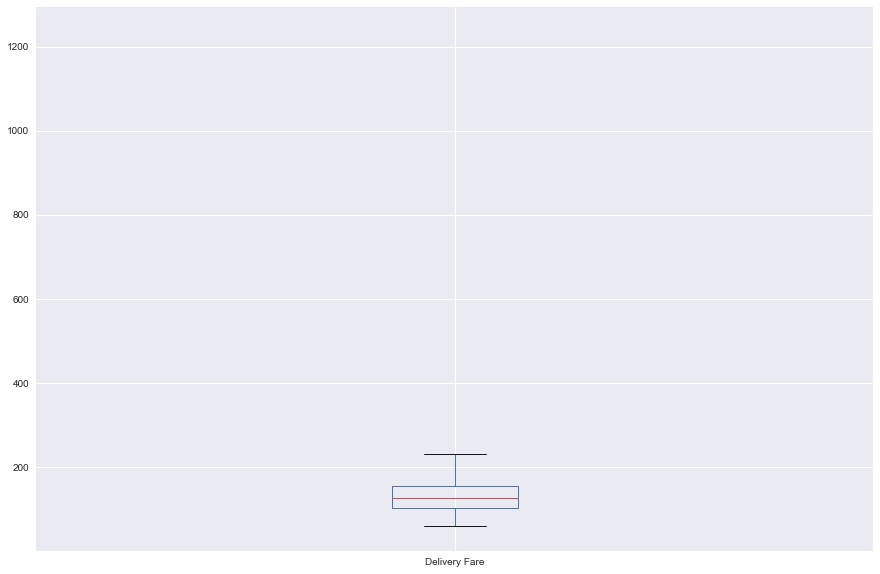

In [80]:
check_out = main_df.boxplot(column='Delivery Fare')

Generating a solution csv file by fetching the fixed columns in it.

In [81]:
main_df.to_csv("30060567_solution.csv", encoding='utf-8', index=False)

## 7: Summary

After analysing and finding errors then fixing the errors by doing graphical and non graphical EDA we get a clean dataset. Most of the errors in the dataset have been found and fixed. I  have fixed Package weight, Post Type, Origin Region, Destination Region, Origin Longitude, Origin Longitude, Destination longitude, Destination Latitude, Delivery Time, Departure Time and Travel Time. Drone Type , Delivery Fare column couldn't be fixed. As there are some columns left for fixing so the IDs duplicates couldn't be removed and the outliers are also not removed.  

## 8: References

1.Key, K. (2018). Map making in Python with Basemap. [online] Research Computing in Earth Sciences. Available at:   https://rabernat.github.io/research_computing/intro-to-basemap.html [Accessed 3 Oct. 2018].

2.Learning, M., code), A. and Singh, A. (2018). A Practical Introduction to K-Nearest Neighbor for Regression. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/ [Accessed 3 Oct. 2018].

3.points), H. (2018). Haversine Formula in Python (Bearing and Distance between two GPS points). [online] Stack Overflow. Available at: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points [Accessed 3 Oct. 2018].

4.Tutorial Week6 - Data Auditing

5.Tutorial Week7 - Missing Value Mean Imputation

6.Tutorial Week8 